In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam



In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df["MTRANS"].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [5]:
df["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [6]:
df["NObeyesdad"]

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [10]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [11]:
X = df.drop("NObeyesdad", axis=1)  
y = df["NObeyesdad"]               

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

num_features = X_train.shape[1]
num_classes = y_train_cat.shape[1]

In [15]:

model = Sequential([
    Dense(256, activation="relu", input_dim=num_features),
    Dropout(0.3),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dropout(0.2),

    Dense(num_classes, activation="softmax")
])


In [16]:
'''
model = Sequential([
    Dense(256, activation="relu", input_dim=num_features),
    Dropout(0.3),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dropout(0.2),

    Dense(num_classes, activation="softmax")
])
'''

'\nmodel = Sequential([\n    Dense(256, activation="relu", input_dim=num_features),\n    Dropout(0.3),\n\n    Dense(128, activation="relu"),\n    Dropout(0.3),\n\n    Dense(64, activation="relu"),\n    Dropout(0.2),\n\n    Dense(num_classes, activation="softmax")\n])\n'

In [17]:
'''
model = Sequential([
    Dense(256, activation="relu", input_dim=num_features),
    Dropout(0.25),

    Dense(128, activation="relu"),
    Dropout(0.25),

    Dense(64, activation="relu"),
    Dropout(0.15),

    Dense(num_classes, activation="softmax")
])
'''

'\nmodel = Sequential([\n    Dense(256, activation="relu", input_dim=num_features),\n    Dropout(0.25),\n\n    Dense(128, activation="relu"),\n    Dropout(0.25),\n\n    Dense(64, activation="relu"),\n    Dropout(0.15),\n\n    Dense(num_classes, activation="softmax")\n])\n'

In [18]:
'''
model = Sequential([
    Dense(512, activation="relu", input_dim=num_features),
    Dropout(0.2),

    Dense(256, activation="relu"),
    Dropout(0.2),

    Dense(128, activation="relu"),
    Dropout(0.1),

    Dense(64, activation="relu"),
    Dropout(0.1),

    Dense(num_classes, activation="softmax")
])
'''

'\nmodel = Sequential([\n    Dense(512, activation="relu", input_dim=num_features),\n    Dropout(0.2),\n\n    Dense(256, activation="relu"),\n    Dropout(0.2),\n\n    Dense(128, activation="relu"),\n    Dropout(0.1),\n\n    Dense(64, activation="relu"),\n    Dropout(0.1),\n\n    Dense(num_classes, activation="softmax")\n])\n'

In [19]:
'''
model.compile(
   optimizer="adam",
   loss="categorical_crossentropy",
   metrics=["accuracy"]
)
'''


'\nmodel.compile(\n   optimizer="adam",\n   loss="categorical_crossentropy",\n   metrics=["accuracy"]\n)\n'

In [20]:

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [21]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [22]:
history = model.fit(
    X_train, y_train_cat,
    epochs=100,
    #batch_size=64,
    batch_size=32,
    validation_split=0.15,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


45/45 [==============================] - 5s 28ms/step - loss: 1.7934 - accuracy: 0.3215 - val_loss: 1.5289 - val_accuracy: 0.4567
Epoch 2/100
45/45 [==============================] - 1s 11ms/step - loss: 1.3566 - accuracy: 0.5084 - val_loss: 1.1424 - val_accuracy: 0.5866
Epoch 3/100
45/45 [==============================] - 1s 11ms/step - loss: 1.0670 - accuracy: 0.5934 - val_loss: 0.9180 - val_accuracy: 0.6929
Epoch 4/100
45/45 [==============================] - 1s 13ms/step - loss: 0.9115 - accuracy: 0.6450 - val_loss: 0.7809 - val_accuracy: 0.7402
Epoch 5/100
45/45 [==============================] - 1s 12ms/step - loss: 0.8183 - accuracy: 0.6660 - val_loss: 0.6982 - val_accuracy: 0.7638
Epoch 6/100
45/45 [==============================] - 1s 11ms/step - loss: 0.7440 - accuracy: 0.7071 - val_loss: 0.6145 - val_accuracy: 0.7795
Epoch 7/100
45/45 [==============================] - 1s 12ms/step - loss: 0.6969 - accuracy: 0.7197 - val_loss: 0.5599 - val_accuracy: 0.7913
Epoc

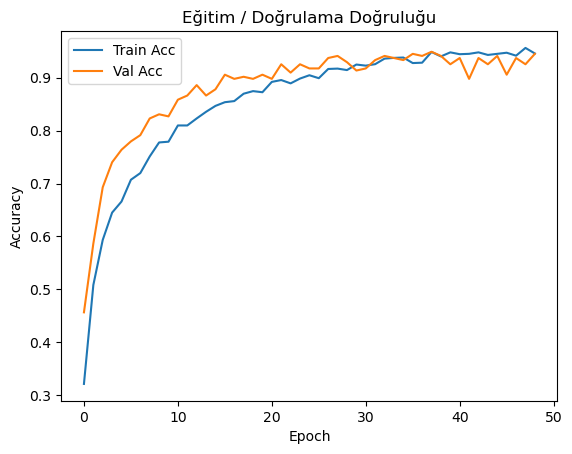

In [23]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Eğitim / Doğrulama Doğruluğu")
plt.show()

In [24]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

acc = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%\n")

print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred))

14/14 [==============================] - 0s 3ms/step

Test Accuracy: 92.43%

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.86      0.74      0.80        58
           2       0.90      1.00      0.95        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.86      0.88      0.87        58
           6       1.00      0.88      0.94        58

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.93      0.92      0.92       423



In [25]:
# ROC Eğrisi

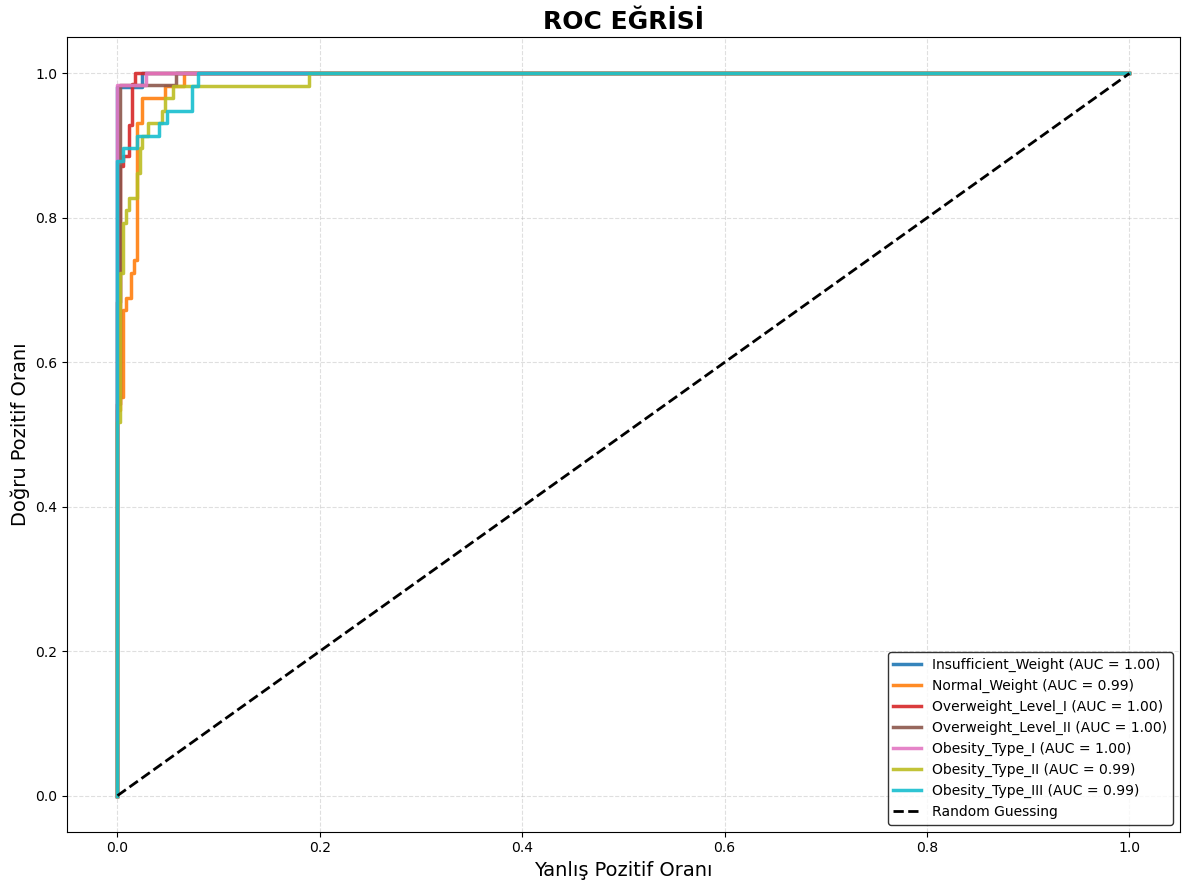

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


class_names = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]

num_classes = len(class_names)


y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))


fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(12, 9))

colors = plt.cm.tab10(np.linspace(0, 1, num_classes))

for i, color in zip(range(num_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2.5,
        alpha=0.9,
        label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guessing")

plt.xlabel("Yanlış Pozitif Oranı", fontsize=14)
plt.ylabel("Doğru Pozitif Oranı", fontsize=14)
plt.title("ROC EĞRİSİ", fontsize=18, fontweight="bold")

plt.grid(True, linestyle="--", alpha=0.4)

plt.legend(
    loc="lower right",
    fontsize=10,
    frameon=True,
    facecolor="white",
    edgecolor="black"
)

plt.tight_layout()
plt.show()


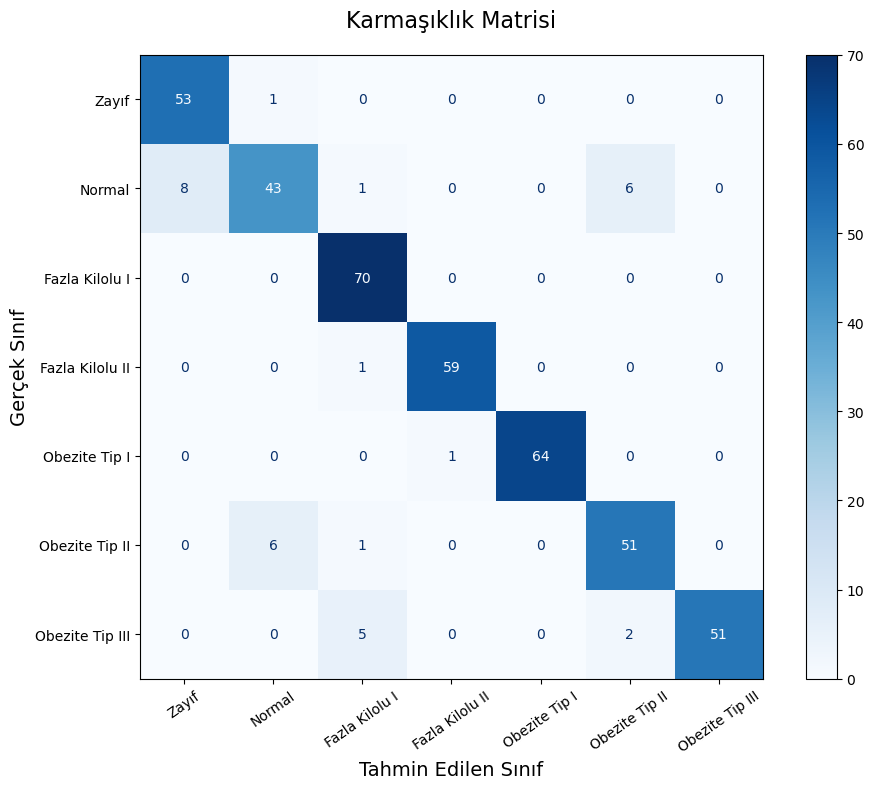

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


class_names = [
    "Zayıf",
    "Normal",
    "Fazla Kilolu I",
    "Fazla Kilolu II",
    "Obezite Tip I",
    "Obezite Tip II",
    "Obezite Tip III"
]


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names
)

disp.plot(
    cmap="Blues",
    values_format='d',
    ax=plt.gca()
)

plt.title("Karmaşıklık Matrisi", fontsize=16, pad=20)


plt.xlabel("Tahmin Edilen Sınıf", fontsize=14)  
plt.ylabel("Gerçek Sınıf", fontsize=14)         

plt.xticks(rotation=35, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()
